In [1]:
# !pip install opencv-python

In [2]:
# !pip install tensorflow

In [4]:
import tensorflow as tf
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import os

In [6]:
img_array=cv2.imread("test_set/Open_Eyes/s0011_01648_0_0_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)

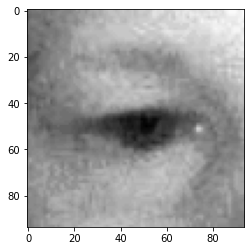

In [7]:
plt.imshow(img_array,cmap='gray')

In [8]:
img_array.shape

(94, 94)

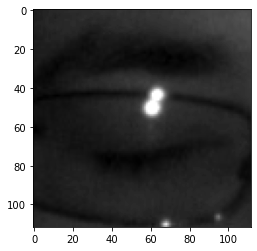

In [10]:
Datadirectory ="test_set/" ## training dataset
Classes = ["Closed_Eyes", "Open_Eyes"] # List of classes
for category in Classes :
        path=os.path.join(Datadirectory, category) #
        for img in os.listdir(path):
            img_array = cv2.imread (os.path.join (path, img), cv2.IMREAD_GRAYSCALE)
            backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
            plt.imshow (img_array, cmap="gray")
            plt.show()
            break
        break

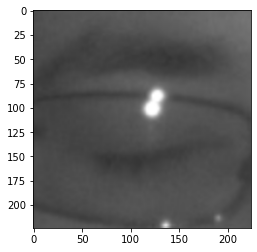

In [11]:
# backtorgb
img_size = 224
new_array= cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [12]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category) #* 0,1,
        for img in os.listdir(path) :
            try:
                img_array= cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array= cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                print(e)
                pass

In [13]:
create_training_Data()

In [14]:
training_Data[1]

[array([[[130, 130, 130],
         [129, 129, 129],
         [128, 128, 128],
         ...,
         [ 69,  69,  69],
         [ 68,  68,  68],
         [ 67,  67,  67]],
 
        [[130, 130, 130],
         [129, 129, 129],
         [128, 128, 128],
         ...,
         [ 69,  69,  69],
         [ 68,  68,  68],
         [ 67,  67,  67]],
 
        [[130, 130, 130],
         [129, 129, 129],
         [128, 128, 128],
         ...,
         [ 68,  68,  68],
         [ 67,  67,  67],
         [ 67,  67,  67]],
 
        ...,
 
        [[ 82,  82,  82],
         [ 80,  80,  80],
         [ 78,  78,  78],
         ...,
         [ 60,  60,  60],
         [ 60,  60,  60],
         [ 61,  61,  61]],
 
        [[ 82,  82,  82],
         [ 80,  80,  80],
         [ 78,  78,  78],
         ...,
         [ 61,  61,  61],
         [ 61,  61,  61],
         [ 62,  62,  62]],
 
        [[ 82,  82,  82],
         [ 80,  80,  80],
         [ 78,  78,  78],
         ...,
         [ 61,  61,  61],
  

In [15]:
print(len(training_Data))

1768


In [16]:
import random

In [17]:
random.shuffle(training_Data)

In [18]:
x=[]
y=[]

for features, label in training_Data:
    x.append(features)
    y.append(label)
    
X = np.array(x).reshape(-1, img_size, img_size, 3)

In [19]:
x[1].shape

(224, 224, 3)

In [20]:
x[1].reshape(-1, img_size, img_size, 3).shape 

(1, 224, 224, 3)

In [21]:
X.shape

(1768, 224, 224, 3)

In [22]:
#normalization
X=X/225.0
Y= np.array(y)

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow. keras import layers

In [24]:
model=tf.keras.applications.mobilenet.MobileNet()

In [25]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [26]:
base_input = model.layers[0].input

In [27]:
base_output = model.layers[-4].output

In [28]:

Flat_layer=layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) ## one node (1/ 0)
final_output =layers.Activation("sigmoid")(final_output)

In [29]:
new_model = keras.Model( inputs =base_input , outputs = final_output)

In [30]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [31]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [32]:
new_model.fit(X,Y,epochs=2 , validation_split=0.1)

Epoch 1/2
50/50 [==============================] - 308s 6s/step - loss: 0.3094 - accuracy: 0.8724 - val_loss: 0.3207 - val_accuracy: 0.8927
Epoch 2/2
50/50 [==============================] - 256s 5s/step - loss: 0.1500 - accuracy: 0.9045 - val_loss: 0.3503 - val_accuracy: 0.8927


In [33]:
new_model.save('drowsniess_model.h5')

In [75]:
#Checking network prediction

In [34]:
img_array=cv2.imread('train_set/Open_Eyes/s0001_01801_0_1_0_0_1_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb=cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array=cv2.resize(backtorgb,(img_size,img_size))

In [35]:
X_input = np.array(new_array).reshape(-1 , img_size, img_size , 3)

In [36]:
X_input=X_input/225.0

In [37]:
X_input

array([[[[0.38222222, 0.38222222, 0.38222222],
         [0.38222222, 0.38222222, 0.38222222],
         [0.38666667, 0.38666667, 0.38666667],
         ...,
         [0.53777778, 0.53777778, 0.53777778],
         [0.53777778, 0.53777778, 0.53777778],
         [0.53777778, 0.53777778, 0.53777778]],

        [[0.38222222, 0.38222222, 0.38222222],
         [0.38222222, 0.38222222, 0.38222222],
         [0.38666667, 0.38666667, 0.38666667],
         ...,
         [0.53777778, 0.53777778, 0.53777778],
         [0.53777778, 0.53777778, 0.53777778],
         [0.53777778, 0.53777778, 0.53777778]],

        [[0.38222222, 0.38222222, 0.38222222],
         [0.38222222, 0.38222222, 0.38222222],
         [0.38666667, 0.38666667, 0.38666667],
         ...,
         [0.53777778, 0.53777778, 0.53777778],
         [0.53777778, 0.53777778, 0.53777778],
         [0.53777778, 0.53777778, 0.53777778]],

        ...,

        [[0.41333333, 0.41333333, 0.41333333],
         [0.41777778, 0.41777778, 0.41777778]

In [38]:
predict = new_model.predict(X_input)

1/1 [==============================] - 5s 5s/step


In [39]:
predict

array([[0.04926866]], dtype=float32)

In [110]:
#eyes and face detetion using opencv

In [79]:
img =cv2.imread('test_image.jpg')

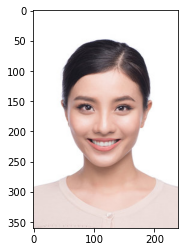

In [80]:
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))

In [81]:
FaceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")

In [82]:
eyeCascade =  cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_eye.xml")

In [83]:
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

In [84]:
eyes = eyeCascade.detectMultiScale(gray ,1.3,3)

In [85]:
for (x ,y, w, h) in eyes:
    cv2.rectangle(img , (x,y) , (x+w , y+h) , (0,255,0) ,1)

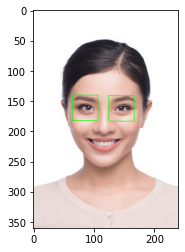

In [86]:
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))

In [87]:
eyes

array([[ 65, 140,  42,  42],
       [125, 141,  42,  42]])

In [101]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_eye.xml")
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray, 1.3,3)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color= img[y:y+h, x:x+w]
    eyess=eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) ==0 :
        print("eyes are not detected")
    else:
        for (ex, ey,ew,eh) in  eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
# eyes_roi = eyes_roi.all()

In [102]:
eyes_roi.shape

(29, 29, 3)

In [105]:
cv2.imshow('Eyes ROI', cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [106]:
final_image =cv2.resize(eyes_roi, (224, 224))
final_image = np.expand_dims(final_image, axis=0)
final_imago=final_image/255.0

In [107]:
final_image.shape

(1, 224, 224, 3)

In [108]:
new_model.predict(final_image)

1/1 [==============================] - 2s 2s/step


array([[0.04281372]], dtype=float32)